# Задача №5

Определение области и функции распределения

In [ ]:
c = 9/1024

def f_X(x):
    """Плотность X"""
    return c * x**8 * ((x >= -2) & (x <= 2))

def F_X(x):
    """Функция распределения X"""
    if x < -2: return 0
    elif x > 2: return 1
    else: return (x**9 + 512)/1024

Для Y = $X^4$

In [ ]:
def f_Y(y):
    """Плотность Y"""
    return (9/2048) * y**(5/4) * ((y >= 0) & (y <= 16))

def F_Y(y):
    """Функция распределения Y"""
    if y < 0: return 0
    elif y > 16: return 1
    else: return y**(9/4)/512

Проверка нормировки

In [ ]:
I_X, _ = quad(f_X, -2, 2)
I_Y, _ = quad(f_Y, 0, 16)
print(f"∫f_X = {I_X:.5f}, ∫f_Y = {I_Y:.5f}")

def moment_X(k):
    val, _ = quad(lambda x: x**k * f_X(x), -2, 2)
    return val

E_X = moment_X(1)
E_X2 = moment_X(2)
E_X4 = moment_X(4)
E_X8 = moment_X(8)

Var_X = E_X2 - E_X**2
sigma_X = np.sqrt(Var_X)

print("\n--- Характеристики X ---")
print(f"E[X] = {E_X:.5f}")
print(f"Var[X] = {Var_X:.5f}")
print(f"σ_X = {sigma_X:.5f}")
print(f"E[X^4] = {E_X4:.5f}, E[X^8] = {E_X8:.5f}")

∫f_X = 1.00000, ∫f_Y = 1.00000

--- Характеристики X ---
E[X] = 0.00000
Var[X] = 3.27273
σ_X = 1.80907
E[X^4] = 11.07692, E[X^8] = 135.52941


Моменты Y = $X^4$

In [ ]:
def moment_Y(k):
    val, _ = quad(lambda y: y**k * f_Y(y), 0, 16)
    return val

E_Y = moment_Y(1)
E_Y2 = moment_Y(2)
Var_Y = E_Y2 - E_Y**2
sigma_Y = np.sqrt(Var_Y)

print("--- Характеристики Y ---")
print(f"E[Y] = {E_Y:.5f}")
print(f"Var[Y] = {Var_Y:.5f}")
print(f"σ_Y = {sigma_Y:.5f}")

# Медиана решением F_Y(m)=0.5
median_Y = (0.5 * 512)**(4/9)
print(f"Median[Y] ≈ {median_Y:.5f}")

--- Характеристики Y ---
E[Y] = 11.07692
Var[Y] = 12.83119
σ_Y = 3.58206
Median[Y] ≈ 11.75788


Визуализация

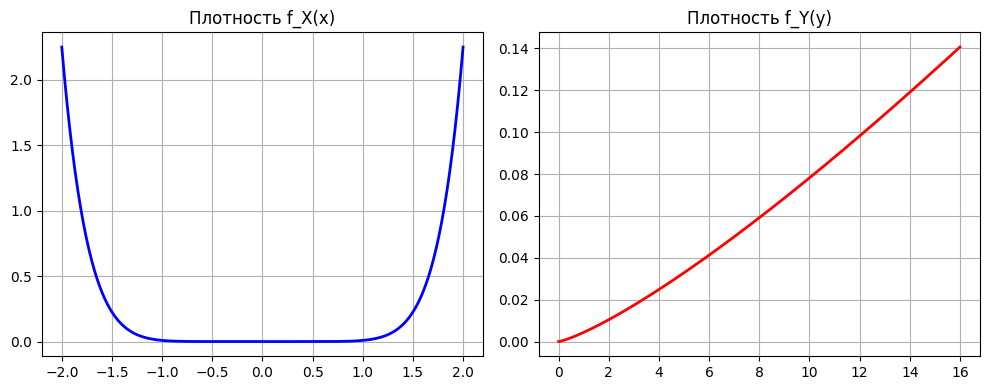

In [ ]:
x = np.linspace(-2, 2, 300)
y = np.linspace(0, 16, 300)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, f_X(x), 'b', lw=2)
plt.title("Плотность f_X(x)")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(y, f_Y(y), 'r', lw=2)
plt.title("Плотность f_Y(y)")
plt.grid(True)

plt.tight_layout()
plt.show()